In [30]:
!pip install pycryptodome

In [8]:
!git clone https://github.com/giacomopope/kyber-py.git

Cloning into 'kyber-py'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 369 (delta 63), reused 50 (delta 50), pack-reused 285
Receiving objects: 100% (369/369), 1.30 MiB | 10.95 MiB/s, done.
Resolving deltas: 100% (208/208), done.


In [9]:
%cd kyber-py
!pip install -r requirements.txt

/content/kyber-py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: pycryptodome
    Found existing installation: pycryptodome 3.20.0
    Uninstalling pycryptodome-3.20.0:
      Successfully uninstalled pycryptodome-3.20.0


In [10]:
!pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [31]:
from kyber import Kyber512

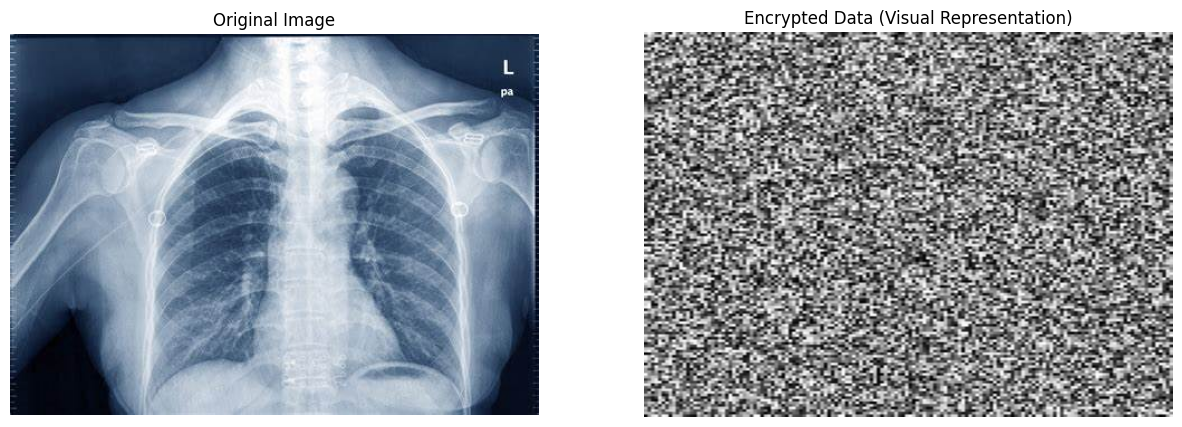

Image encrypted and saved to encrypted_image.bin


In [100]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to read an image file and return its byte data
def read_image(file_path):
    with open(file_path, 'rb') as f:
        return f.read()


# Encrypt the image data
def encrypt_image(image_data, key):
    cipher = AES.new(key, AES.MODE_GCM)
    ciphertext, tag = cipher.encrypt_and_digest(image_data)
    return cipher.nonce, tag, ciphertext

# Paths to your input and output files
image_path = '/content/OIP.jpg'  # Update with your image path
encrypted_image_path = 'encrypted_image.bin'

# # Generate a random key
# key = get_random_bytes(16)  # AES-128

# Function to write binary data to a file
def write_file(file_path, data):
    with open(file_path, 'wb') as f:
        f.write(data)

# Kyber key generation
pk, sk = Kyber512.keygen()

# Encapsulate the AES key using Kyber
c, aes_key = Kyber512.enc(pk)

# Save the ciphertext and Kyber secret key to files
with open('ciphertext.bin', 'wb') as f:
    f.write(c)

with open('secret_key.bin', 'wb') as f:
    f.write(sk)

# Read the original image
original_image_data = read_image(image_path)

# Encrypt the image
nonce, tag, encrypted_data = encrypt_image(original_image_data, aes_key)
write_file(encrypted_image_path, nonce + tag + encrypted_data)

# Save the key for decryption
with open('key.bin', 'wb') as f:
    f.write(key)

# Visual representation of the encrypted data
encrypted_image_visual = np.frombuffer(encrypted_data, dtype=np.uint8)
height = int(np.sqrt(encrypted_image_visual.size))
width = (encrypted_image_visual.size + height - 1) // height  # Ensure width is enough to hold all data
encrypted_image_visual = np.resize(encrypted_image_visual, (height, width))

# Load the original image using PIL
original_image = Image.open(image_path)

# Display the original and encrypted images
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Encrypted Data (Visual Representation)")
plt.imshow(encrypted_image_visual, cmap='gray', aspect='auto')
plt.axis('off')

plt.show()

print(f"Image encrypted and saved to {encrypted_image_path}")

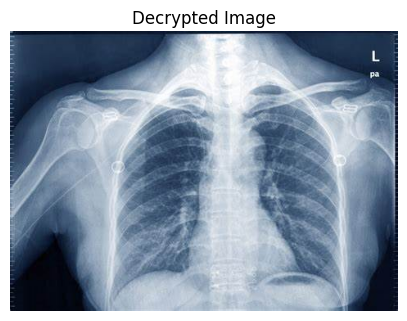

Image decrypted and saved to decrypted_image.png


In [101]:
from Crypto.Cipher import AES
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to write binary data to a file
def write_file(file_path, data):
    with open(file_path, 'wb') as f:
        f.write(data)

# Decrypt the image data
def decrypt_image(nonce, tag, ciphertext, key):
    cipher = AES.new(key, AES.MODE_GCM, nonce=nonce)
    decrypted_data = cipher.decrypt_and_verify(ciphertext, tag)
    return decrypted_data

# Function to read binary data from a file
def read_file(file_path):
    with open(file_path, 'rb') as f:
        return f.read()
# Load the Kyber secret key
sk = read_file('secret_key.bin')

# Load the ciphertext
c = read_file('ciphertext.bin')

# Decapsulate the AES key using Kyber
decapsulated_key = Kyber512.dec(c, sk)


# Paths to your input and output files
encrypted_image_path = 'encrypted_image.bin'
decrypted_image_path = 'decrypted_image.png'

# Load the key for decryption
with open('key.bin', 'rb') as f:
    key = f.read()

# Read the encrypted data from the file
with open(encrypted_image_path, 'rb') as f:
    nonce = f.read(16)
    tag = f.read(16)
    ciphertext = f.read()

# Decrypt the image
decrypted_image_data = decrypt_image(nonce, tag, ciphertext, decapsulated_key)
write_file(decrypted_image_path, decrypted_image_data)

# Load the decrypted image using PIL
decrypted_image = Image.open(decrypted_image_path)

# Display the decrypted image
plt.figure(figsize=(5, 5))

plt.title("Decrypted Image")
plt.imshow(decrypted_image)
plt.axis('off')

plt.show()

print(f"Image decrypted and saved to {decrypted_image_path}")